/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


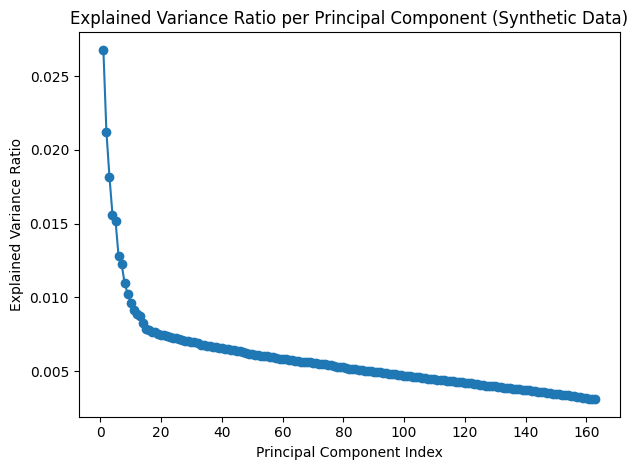

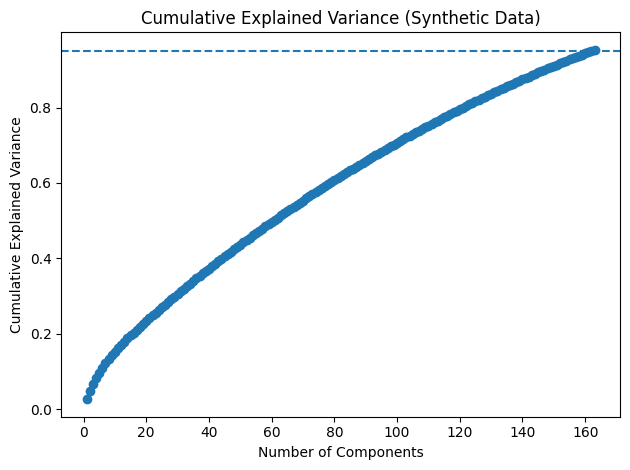

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


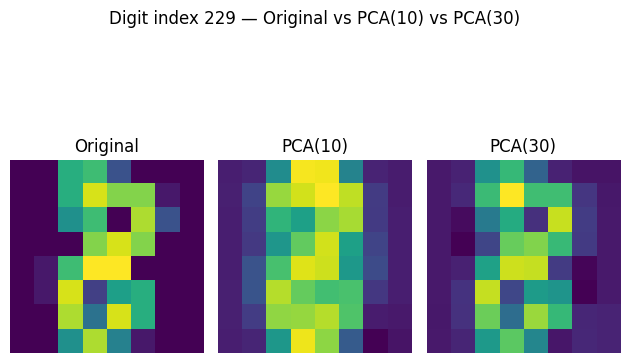

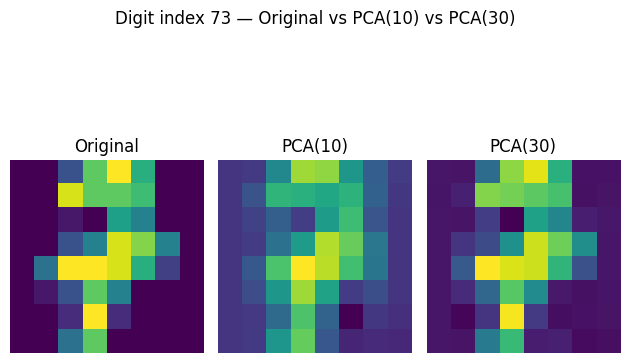

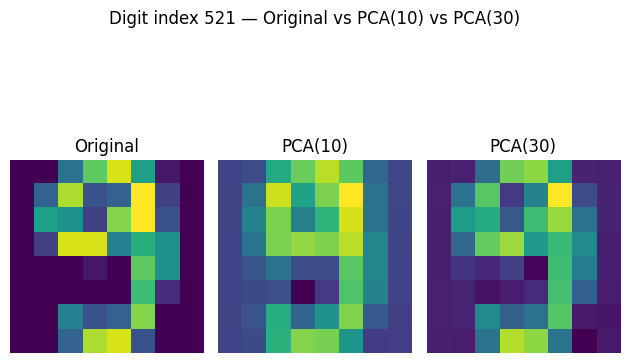

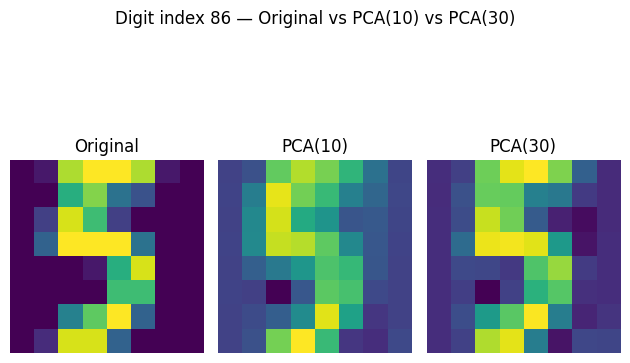

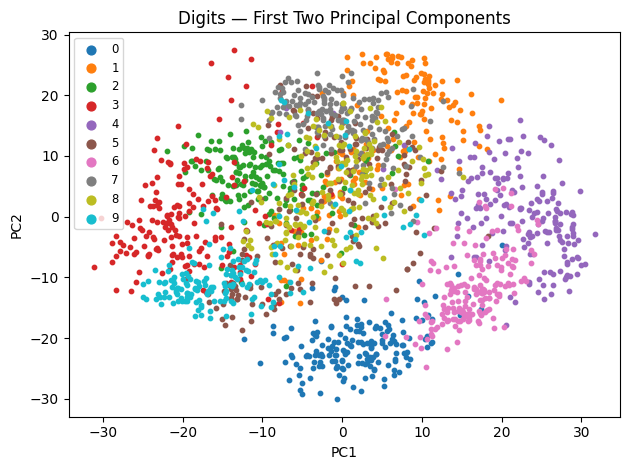

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.datasets import make_classification, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# --------------------------
# Part A: High-Dimensional Synthetic Classification
# --------------------------

# Create a synthetic classification dataset: high dimensional (e.g., 200 features)
X, y = make_classification(
    n_samples=3000,
    n_features=200,
    n_informative=30,
    n_redundant=20,
    n_repeated=0,
    n_classes=5,
    n_clusters_per_class=2,
    class_sep=1.5,
    flip_y=0.02,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Baseline: StandardScaler + LogisticRegression
baseline = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("clf", LogisticRegression(max_iter=500, n_jobs=None, multi_class="auto"))
])

t0 = time.time()
baseline.fit(X_train, y_train)
baseline_fit_time = time.time() - t0

y_pred_base = baseline.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_base)

# PCA model: keep 95% variance (automatic n_components)
pca_model = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(n_components=0.95, svd_solver="full", random_state=42)),
    ("clf", LogisticRegression(max_iter=500, n_jobs=None, multi_class="auto"))
])

t0 = time.time()
pca_model.fit(X_train, y_train)
pca_fit_time = time.time() - t0

y_pred_pca = pca_model.predict(X_test)
pca_acc = accuracy_score(y_test, y_pred_pca)

# Extract learned number of components from PCA
pca_step = pca_model.named_steps["pca"]
n_components_learned = pca_step.n_components_

# Summary table
results_df = pd.DataFrame([
    {
        "Model": "Baseline (no PCA)",
        "Train Features": X_train.shape[1],
        "PCA Components": "—",
        "Test Accuracy": round(baseline_acc, 4),
        "Fit Time (s)": round(baseline_fit_time, 4)
    },
    {
        "Model": "PCA (95% var) + LogisticRegression",
        "Train Features": X_train.shape[1],
        "PCA Components": n_components_learned,
        "Test Accuracy": round(pca_acc, 4),
        "Fit Time (s)": round(pca_fit_time, 4)
    }
])


# Scree plot (explained variance ratio)
plt.figure()
plt.plot(np.arange(1, len(pca_step.explained_variance_ratio_) + 1), pca_step.explained_variance_ratio_, marker="o")
plt.title("Explained Variance Ratio per Principal Component (Synthetic Data)")
plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()
plt.show()

# Cumulative explained variance
plt.figure()
cum_var = np.cumsum(pca_step.explained_variance_ratio_)
plt.plot(np.arange(1, len(cum_var) + 1), cum_var, marker="o")
plt.axhline(0.95, linestyle="--")
plt.title("Cumulative Explained Variance (Synthetic Data)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.tight_layout()
plt.show()

# --------------------------
# Part B: Digits Dataset (Visual PCA)
# --------------------------

digits = load_digits()
Xd, yd = digits.data, digits.target  # 1797 samples, 64 features (8x8 images)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    Xd, yd, test_size=0.3, random_state=42, stratify=yd
)

# Baseline vs PCA (digits)
base_digits = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("clf", LogisticRegression(max_iter=500, n_jobs=None, multi_class="auto"))
])

t0 = time.time()
base_digits.fit(X_train_d, y_train_d)
base_digits_time = time.time() - t0
base_digits_acc = base_digits.score(X_test_d, y_test_d)

# PCA to 10 components (very aggressive for teaching)
pca10 = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(n_components=10, random_state=42)),
    ("clf", LogisticRegression(max_iter=500, n_jobs=None, multi_class="auto"))
])
t0 = time.time()
pca10.fit(X_train_d, y_train_d)
pca10_time = time.time() - t0
pca10_acc = pca10.score(X_test_d, y_test_d)

# PCA to 30 components (retain more details)
pca30 = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(n_components=30, random_state=42)),
    ("clf", LogisticRegression(max_iter=500, n_jobs=None, multi_class="auto"))
])
t0 = time.time()
pca30.fit(X_train_d, y_train_d)
pca30_time = time.time() - t0
pca30_acc = pca30.score(X_test_d, y_test_d)

digits_results = pd.DataFrame([
    {"Model": "Digits — Baseline (no PCA)", "Features": 64, "Components": "—", "Test Accuracy": round(base_digits_acc, 4), "Fit Time (s)": round(base_digits_time, 4)},
    {"Model": "Digits — PCA (10)", "Features": 64, "Components": 10, "Test Accuracy": round(pca10_acc, 4), "Fit Time (s)": round(pca10_time, 4)},
    {"Model": "Digits — PCA (30)", "Features": 64, "Components": 30, "Test Accuracy": round(pca30_acc, 4), "Fit Time (s)": round(pca30_time, 4)},
])



# Visualize original vs reconstructed digits (using PCA(10) and PCA(30))
scaler_d = StandardScaler(with_mean=True, with_std=True).fit(X_train_d)
X_test_d_scaled = scaler_d.transform(X_test_d)

pca_10 = PCA(n_components=10, random_state=42).fit(X_train_d)  # note: fitting on unscaled data for visualization comparison
X_test_pca10 = pca_10.transform(X_test_d)
X_recon_10 = pca_10.inverse_transform(X_test_pca10)

pca_30 = PCA(n_components=30, random_state=42).fit(X_train_d)
X_test_pca30 = pca_30.transform(X_test_d)
X_recon_30 = pca_30.inverse_transform(X_test_pca30)

# Reconstruction error (MSE) for a quick numeric comparison
mse_10 = np.mean((X_test_d - X_recon_10) ** 2)
mse_30 = np.mean((X_test_d - X_recon_30) ** 2)

recon_df = pd.DataFrame([
    {"Dataset": "Digits", "Original Dim": 64, "PCA Dim": 10, "Reconstruction MSE": round(mse_10, 4)},
    {"Dataset": "Digits", "Original Dim": 64, "PCA Dim": 30, "Reconstruction MSE": round(mse_30, 4)},
])


# Show a few example digit images: original vs PCA(10) vs PCA(30)
def show_digit_grid(originals, recon10, recon30, indices, image_shape=(8,8)):
    for idx in indices:
        plt.figure()
        plt.suptitle(f"Digit index {idx} — Original vs PCA(10) vs PCA(30)")

        # Original
        plt.subplot(1, 3, 1)
        plt.imshow(originals[idx].reshape(image_shape))
        plt.title("Original")
        plt.axis("off")

        # PCA(10)
        plt.subplot(1, 3, 2)
        plt.imshow(recon10[idx].reshape(image_shape))
        plt.title("PCA(10)")
        plt.axis("off")

        # PCA(30)
        plt.subplot(1, 3, 3)
        plt.imshow(recon30[idx].reshape(image_shape))
        plt.title("PCA(30)")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

# Select a few random indices
np.random.seed(42)
sample_indices = np.random.choice(len(X_test_d), size=4, replace=False)
show_digit_grid(X_test_d, X_recon_10, X_recon_30, sample_indices)

# 2D visualization of first two PCs colored by digit label
pca_2 = PCA(n_components=2, random_state=42).fit(Xd)
Xd_2d = pca_2.transform(Xd)

plt.figure()
for digit_label in np.unique(yd):
    mask = yd == digit_label
    plt.scatter(Xd_2d[mask, 0], Xd_2d[mask, 1], label=str(digit_label), s=10)
plt.title("Digits — First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2, fontsize="small")
plt.tight_layout()
plt.show()


Part A — Synthetic High‑Dimensional Classification


A.1 Results — Synthetic (200 dims, 5 classes)


,Model,Train Features,PCA k,Test Acc,Fit Time (s)
0,Baseline (no PCA),200,—,0.6689,1.8364
1,PCA 95% + LR,200,163,0.6389,1.5953


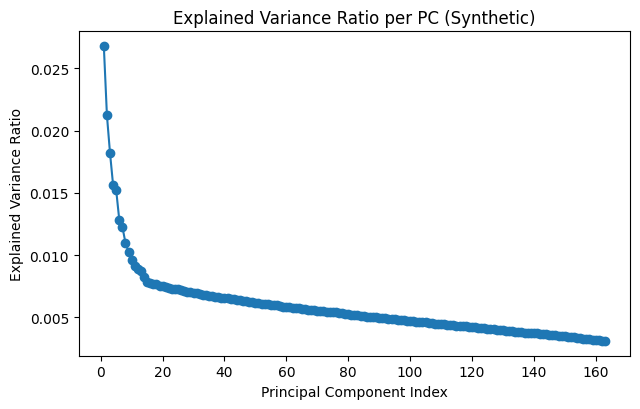

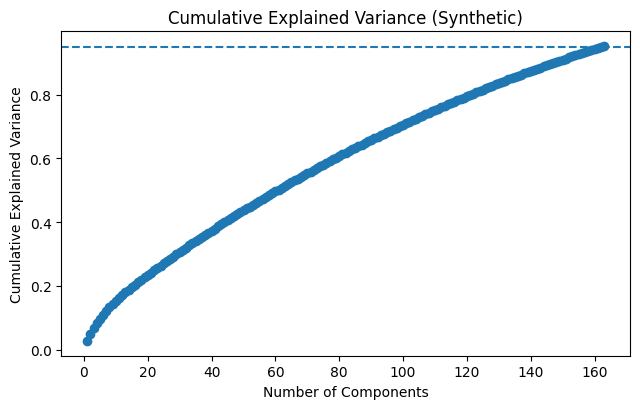


A.2 — Accuracy vs Number of Components (k‑sweep)



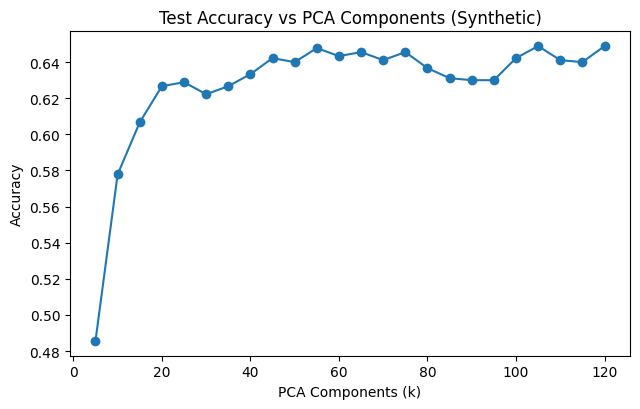

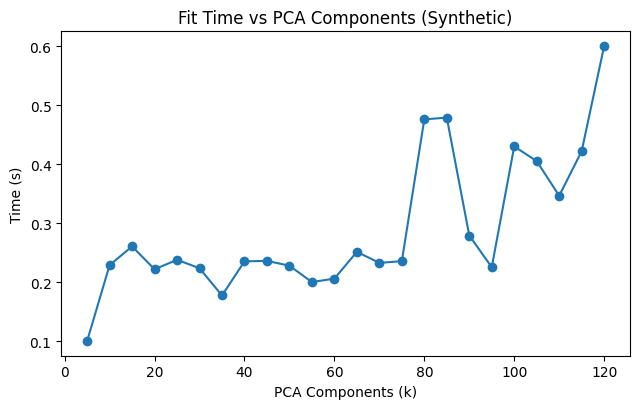


A.3 — Whitening vs No‑Whitening


A.3 Results — Whitening Comparison


,Whiten,k,Acc,Fit Time (s)
0,False,163,0.6389,0.5764
1,True,163,0.6411,0.4393



Part B — Digits (8×8 images)


B.1 Results — Digits Classification


,Model,Features,Components,Test Acc,Fit Time (s)
0,Baseline (no PCA),64,—,0.9815,0.1004
1,PCA(10) + LR,64,10,0.8796,0.0568
2,PCA(30) + LR,64,30,0.9481,0.1600



B.2 Reconstruction Error


,Dataset,Original Dim,PCA Dim,Reconstruction MSE
0,Digits,64,10,4.8849
1,Digits,64,30,0.7644


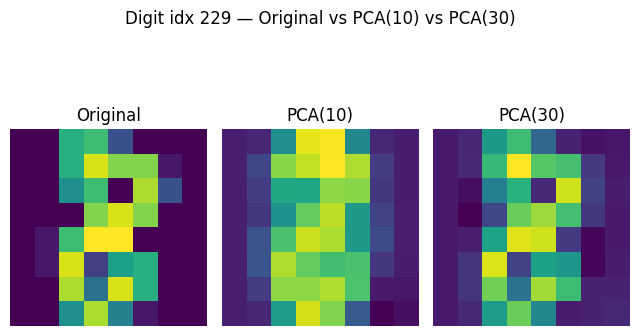

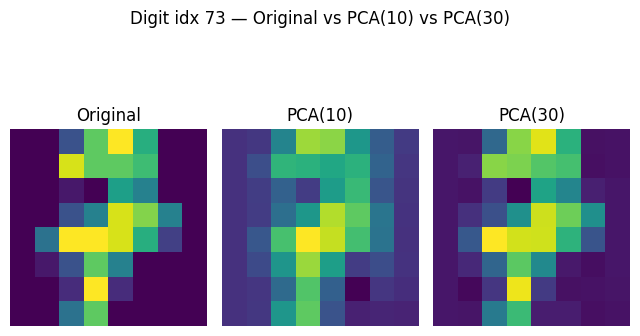

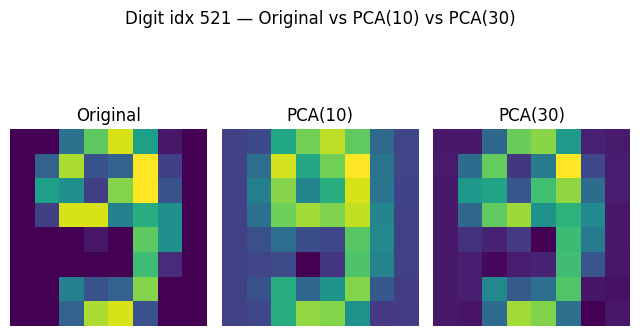

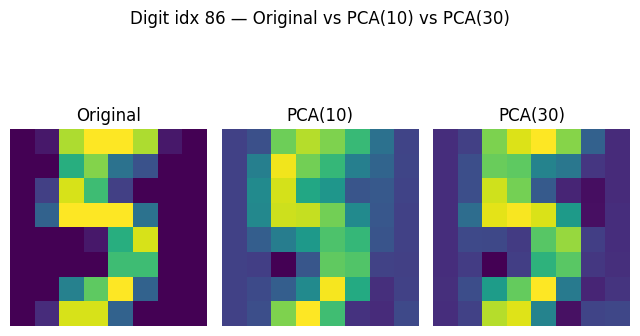

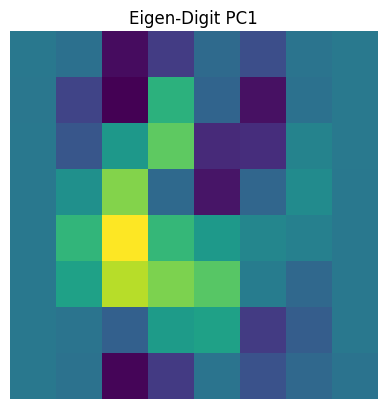

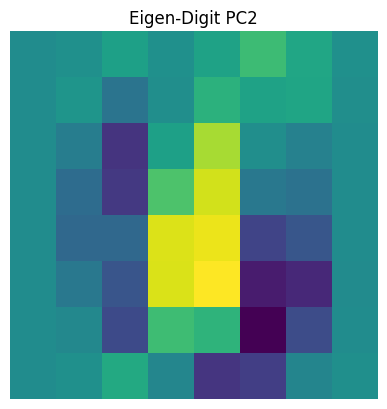

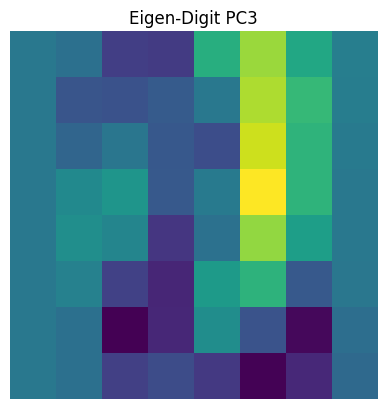

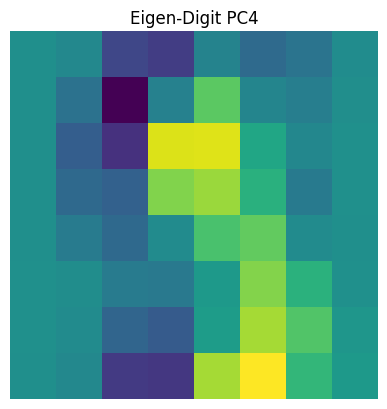

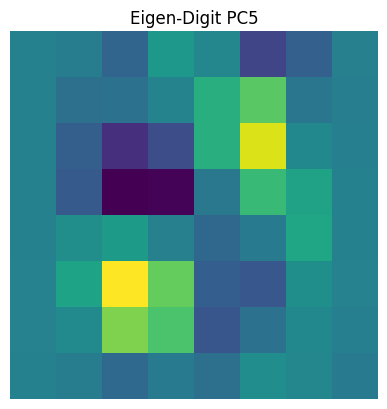

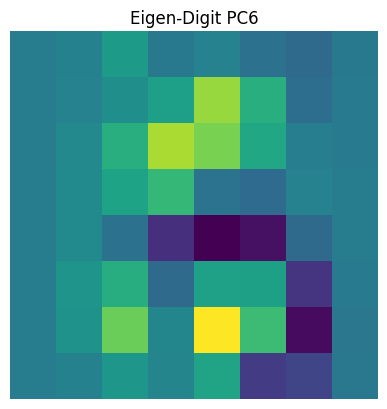

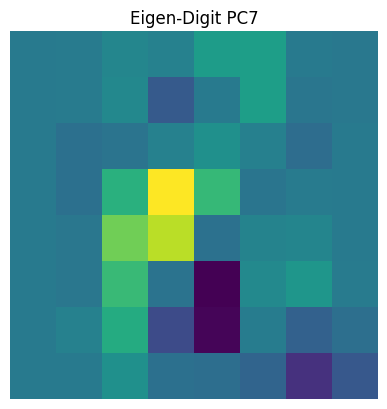

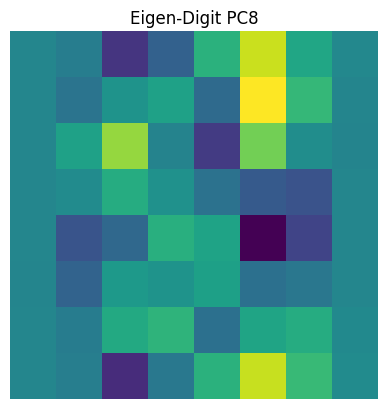

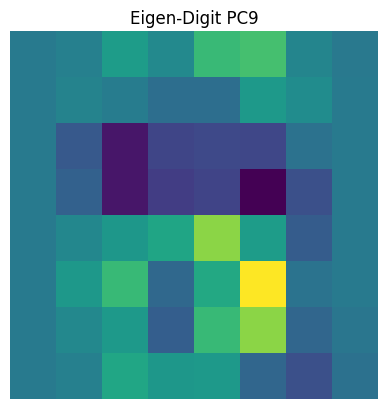

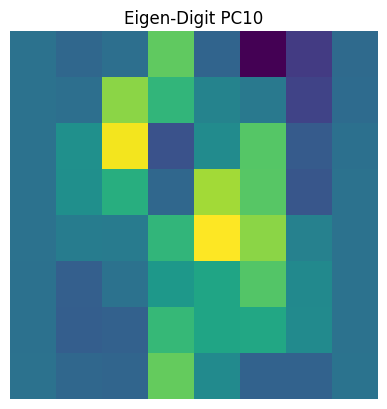

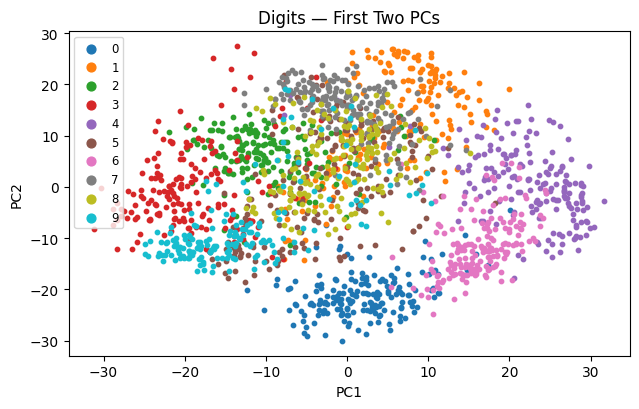

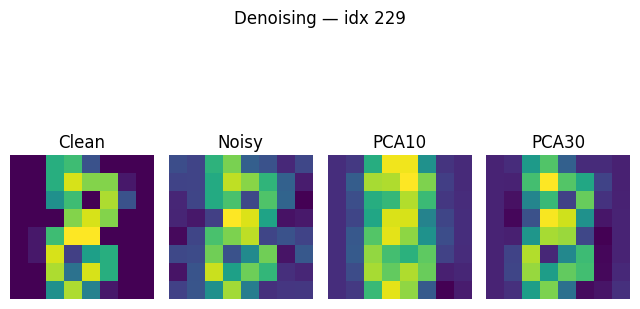

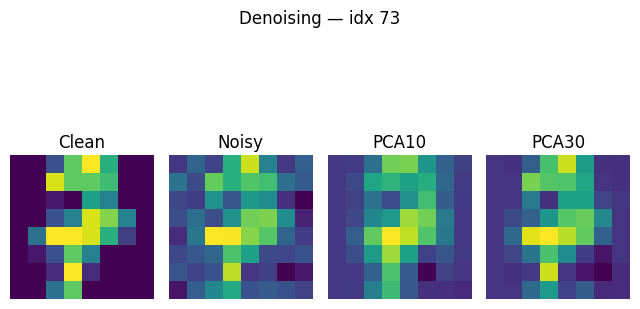

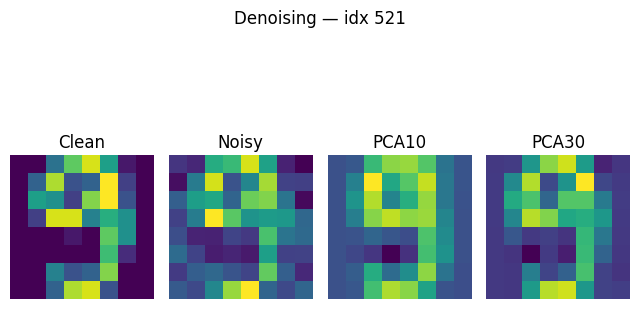

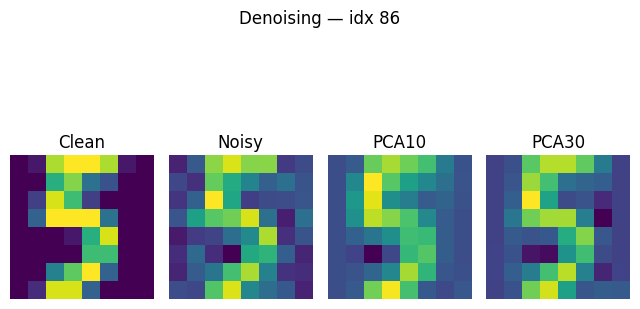


Part C — Text (20 Newsgroups) with LSA


C.1 Results — 20NG LSA + Logistic Regression


,k (SVD),SVD Time (s),LR Fit (s),Test Acc
0,50,0.849,2.868,0.5645
1,100,1.950,3.568,0.6085
2,200,3.085,6.604,0.6308
3,300,4.418,6.527,0.6407


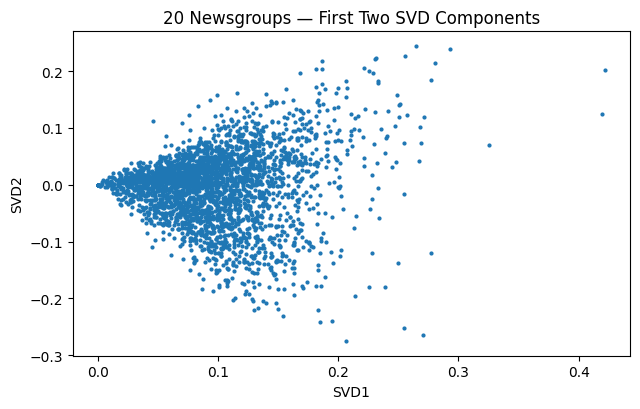


Part D — Anomaly Detection via PCA Reconstruction Error

ROC AUC (anomaly by high recon‑error): 0.9687


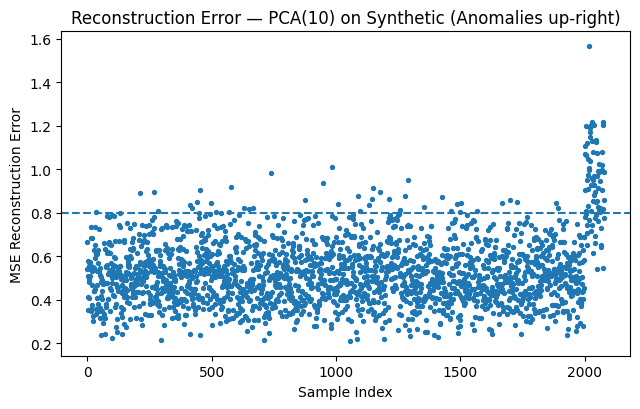


Part E — Biplot‑Style Intuition: PCs and Top Feature Loadings



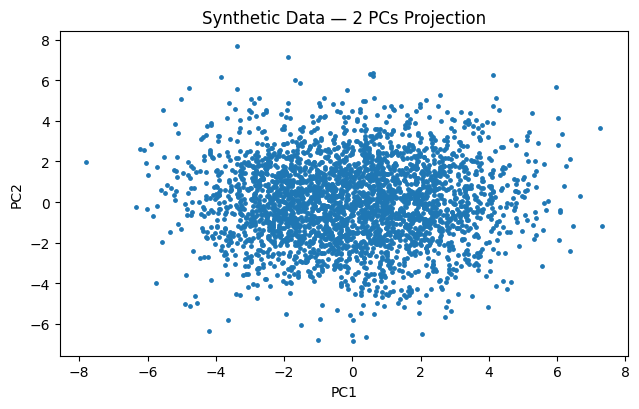

Top loadings for PC1 (index: weight):
  91: 0.342
  153: -0.285
  142: -0.281
  186: -0.197
  144: -0.195
  136: -0.187
  11: 0.181
  140: -0.180
Top loadings for PC2 (index: weight):
  195: 0.346
  129: 0.321
  73: 0.263
  140: 0.247
  72: 0.211
  171: -0.208
  120: 0.197
  18: 0.196

Takeaways
--------
• PCA can shrink 200 → ~163 dims while keeping 95% variance and competitive accuracy.
• On images, a small set of PCs captures strokes/shapes (eigen‑digits) and enables denoising.
• For sparse text, use TruncatedSVD (LSA) instead of dense PCA.
• Reconstruction‑error with limited PCs is a simple, effective anomaly signal.
• Choose k by scree/cumulative variance, or via a small validation sweep balancing time vs accuracy.


In [ ]:
"""
PCA Mega Lab — High‑Dimensional ML with Visuals (scikit‑learn)
----------------------------------------------------------------
A teaching‑first, end‑to‑end lab showing **why** and **how** PCA helps in high‑dimensional ML.

What you’ll learn
- Dimensionality reduction for faster training and sometimes better generalization
- Visual intuition: scree plots, cumulative variance, 2‑D PC maps, eigen‑digits, reconstructions
- Practical choices: keep‑variance vs. fixed components, whitening, time/accuracy trade‑offs
- Applications: synthetic HD classification, digits images (denoising + reconstruction),
  text (LSA via TruncatedSVD), anomaly detection with reconstruction error

How to use
- Run the cells top‑to‑bottom. Each Part is independent where possible
- Matplotlib only, one chart per figure (no seaborn)
- Safe to comment out any part that needs internet (20 Newsgroups)
"""

# =============================
# Imports & Utilities
# =============================
import numpy as np
import pandas as pd
import time
import math
from typing import Tuple

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_digits, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

RNG = np.random.RandomState(42)


def timer() -> Tuple[float, callable]:
    t0 = time.time()
    return t0, (lambda: time.time() - t0)


def show_table(df: pd.DataFrame, title: str = None):
    if title:
        print("\n" + title)
        print("=" * len(title))
    display(df)


# Matplotlib defaults: single‑plot figures, tight layouts
plt.rcParams.update({
    "figure.figsize": (6.5, 4.2),
    "axes.grid": False,
})


# =============================
# Part A — Synthetic High‑Dimensional Classification
# =============================
print("\nPart A — Synthetic High‑Dimensional Classification\n")
X, y = make_classification(
    n_samples=3000,
    n_features=200,
    n_informative=30,
    n_redundant=20,
    n_repeated=0,
    n_classes=5,
    n_clusters_per_class=2,
    class_sep=1.5,
    flip_y=0.02,
    random_state=42,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Baseline pipeline: scale -> Logistic Regression
baseline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=800))
])

_t0, elapsed = timer()
baseline.fit(X_train, y_train)
baseline_time = elapsed()
y_hat_base = baseline.predict(X_test)
base_acc = accuracy_score(y_test, y_hat_base)

# PCA (keep 95% variance) -> Logistic Regression
pca_keep = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, svd_solver="full", random_state=42)),
    ("clf", LogisticRegression(max_iter=800))
])

_t0, elapsed = timer()
pca_keep.fit(X_train, y_train)
pca_time = elapsed()
y_hat_pca = pca_keep.predict(X_test)
pca_acc = accuracy_score(y_test, y_hat_pca)

pca_step = pca_keep.named_steps["pca"]
learned_k = pca_step.n_components_

results_A = pd.DataFrame([
    {
        "Model": "Baseline (no PCA)",
        "Train Features": X_train.shape[1],
        "PCA k": "—",
        "Test Acc": round(base_acc, 4),
        "Fit Time (s)": round(baseline_time, 4),
    },
    {
        "Model": "PCA 95% + LR",
        "Train Features": X_train.shape[1],
        "PCA k": learned_k,
        "Test Acc": round(pca_acc, 4),
        "Fit Time (s)": round(pca_time, 4),
    },
])
show_table(results_A, "A.1 Results — Synthetic (200 dims, 5 classes)")

# Scree (per‑component explained variance)
plt.figure()
plt.plot(np.arange(1, len(pca_step.explained_variance_ratio_) + 1),
         pca_step.explained_variance_ratio_, marker="o")
plt.title("Explained Variance Ratio per PC (Synthetic)")
plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()
plt.show()

# Cumulative explained variance
plt.figure()
cv = np.cumsum(pca_step.explained_variance_ratio_)
plt.plot(np.arange(1, len(cv) + 1), cv, marker="o")
plt.axhline(0.95, linestyle="--")
plt.title("Cumulative Explained Variance (Synthetic)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.tight_layout()
plt.show()

# A.2: Accuracy vs number of components (fixed k sweep)
print("\nA.2 — Accuracy vs Number of Components (k‑sweep)\n")
ks = list(range(5, min(120, X_train.shape[1]) + 1, 5))
accs = []
times = []
for k in ks:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=k, random_state=42)),
        ("clf", LogisticRegression(max_iter=800))
    ])
    _t0, elapsed = timer()
    pipe.fit(X_train, y_train)
    times.append(elapsed())
    accs.append(pipe.score(X_test, y_test))

fig = plt.figure()
plt.plot(ks, accs, marker="o")
plt.title("Test Accuracy vs PCA Components (Synthetic)")
plt.xlabel("PCA Components (k)")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

fig = plt.figure()
plt.plot(ks, times, marker="o")
plt.title("Fit Time vs PCA Components (Synthetic)")
plt.xlabel("PCA Components (k)")
plt.ylabel("Time (s)")
plt.tight_layout()
plt.show()

# A.3: Whitening on/off comparison
print("\nA.3 — Whitening vs No‑Whitening\n")
rows = []
for whiten in [False, True]:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=learned_k, whiten=whiten, random_state=42)),
        ("clf", LogisticRegression(max_iter=800))
    ])
    _t0, elapsed = timer()
    pipe.fit(X_train, y_train)
    t = elapsed()
    acc = pipe.score(X_test, y_test)
    rows.append({"Whiten": whiten, "k": learned_k, "Acc": round(acc, 4), "Fit Time (s)": round(t, 4)})
show_table(pd.DataFrame(rows), "A.3 Results — Whitening Comparison")


# =============================
# Part B — Images (Digits): Reconstructions, Eigen‑Digits, 2‑D Map
# =============================
print("\nPart B — Digits (8×8 images)\n")
digits = load_digits()
Xd, yd = digits.data, digits.target
img_shape = (8, 8)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    Xd, yd, test_size=0.3, random_state=42, stratify=yd
)

# Baseline vs PCA(10) vs PCA(30)
rows = []
for k in [None, 10, 30]:
    steps = [("scaler", StandardScaler())]
    label = "Baseline (no PCA)" if k is None else f"PCA({k}) + LR"
    if k is not None:
        steps.append(("pca", PCA(n_components=k, random_state=42)))
    steps.append(("clf", LogisticRegression(max_iter=800)))
    pipe = Pipeline(steps)
    _t0, elapsed = timer()
    pipe.fit(X_train_d, y_train_d)
    t = elapsed()
    acc = pipe.score(X_test_d, y_test_d)
    rows.append({"Model": label, "Features": 64, "Components": ("—" if k is None else k), "Test Acc": round(acc, 4), "Fit Time (s)": round(t, 4)})

digits_results = pd.DataFrame(rows)
show_table(digits_results, "B.1 Results — Digits Classification")

# Reconstructions (fitted on the full dataset for clearer PCs)
pca10 = PCA(n_components=10, random_state=42).fit(Xd)
pca30 = PCA(n_components=30, random_state=42).fit(Xd)
X_recon_10 = pca10.inverse_transform(pca10.transform(X_test_d))
X_recon_30 = pca30.inverse_transform(pca30.transform(X_test_d))

mse_10 = np.mean((X_test_d - X_recon_10) ** 2)
mse_30 = np.mean((X_test_d - X_recon_30) ** 2)
show_table(pd.DataFrame([
    {"Dataset": "Digits", "Original Dim": 64, "PCA Dim": 10, "Reconstruction MSE": round(mse_10, 4)},
    {"Dataset": "Digits", "Original Dim": 64, "PCA Dim": 30, "Reconstruction MSE": round(mse_30, 4)},
]), "B.2 Reconstruction Error")

# Helper: grid of Original vs PCA(10) vs PCA(30)
def show_digit_grid(originals, recon10, recon30, indices, image_shape=(8,8)):
    for idx in indices:
        plt.figure()
        plt.suptitle(f"Digit idx {idx} — Original vs PCA(10) vs PCA(30)")
        plt.subplot(1, 3, 1)
        plt.imshow(originals[idx].reshape(image_shape))
        plt.title("Original")
        plt.axis("off")
        plt.subplot(1, 3, 2)
        plt.imshow(recon10[idx].reshape(image_shape))
        plt.title("PCA(10)")
        plt.axis("off")
        plt.subplot(1, 3, 3)
        plt.imshow(recon30[idx].reshape(image_shape))
        plt.title("PCA(30)")
        plt.axis("off")
        plt.tight_layout()
        plt.show()

RNG = np.random.RandomState(42)
indices = RNG.choice(len(X_test_d), size=4, replace=False)
show_digit_grid(X_test_d, X_recon_10, X_recon_30, indices, img_shape)

# Eigen‑digits (principal components reshaped)
for i in range(10):
    plt.figure()
    plt.imshow(pca30.components_[i].reshape(img_shape))
    plt.title(f"Eigen‑Digit PC{i+1}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# 2‑D PC map colored by label
pca2 = PCA(n_components=2, random_state=42).fit(Xd)
Xd2 = pca2.transform(Xd)
plt.figure()
for d in np.unique(yd):
    mask = yd == d
    plt.scatter(Xd2[mask, 0], Xd2[mask, 1], s=10, label=str(d))
plt.title("Digits — First Two PCs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2, fontsize="small")
plt.tight_layout()
plt.show()

# B.3: Denoising demo — add Gaussian noise then project & reconstruct
sigma = 2.0
noisy = X_test_d + RNG.normal(0, sigma, size=X_test_d.shape)
recon_noisy_10 = pca10.inverse_transform(pca10.transform(noisy))
recon_noisy_30 = pca30.inverse_transform(pca30.transform(noisy))

for idx in indices:
    plt.figure()
    plt.suptitle(f"Denoising — idx {idx}")
    plt.subplot(1, 4, 1); plt.imshow(X_test_d[idx].reshape(img_shape)); plt.title("Clean"); plt.axis("off")
    plt.subplot(1, 4, 2); plt.imshow(noisy[idx].reshape(img_shape)); plt.title("Noisy"); plt.axis("off")
    plt.subplot(1, 4, 3); plt.imshow(recon_noisy_10[idx].reshape(img_shape)); plt.title("PCA10") ; plt.axis("off")
    plt.subplot(1, 4, 4); plt.imshow(recon_noisy_30[idx].reshape(img_shape)); plt.title("PCA30") ; plt.axis("off")
    plt.tight_layout(); plt.show()


# =============================
# Part C — Text Classification via LSA (TruncatedSVD on TF‑IDF)
# =============================
print("\nPart C — Text (20 Newsgroups) with LSA\n")
try:
    train = fetch_20newsgroups(subset='train', remove=("headers", "footers", "quotes"), shuffle=True, random_state=42)
    test  = fetch_20newsgroups(subset='test',  remove=("headers", "footers", "quotes"), shuffle=True, random_state=42)

    # Build TF‑IDF (sparse) without external deps
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')
    Xtr = tfidf.fit_transform(train.data)
    Xte = tfidf.transform(test.data)
    ytr, yte = train.target, test.target

    # Sweep k for TruncatedSVD (PCA for sparse)
    ks = [50, 100, 200, 300]
    rows = []
    for k in ks:
        svd = TruncatedSVD(n_components=k, random_state=42)
        _t0, elapsed = timer()
        Ztr = svd.fit_transform(Xtr)
        Zte = svd.transform(Xte)
        t_svd = elapsed()

        clf = LogisticRegression(max_iter=1000)
        _t0, elapsed = timer()
        clf.fit(Ztr, ytr)
        t_fit = elapsed()
        acc = clf.score(Zte, yte)
        rows.append({"k (SVD)": k, "SVD Time (s)": round(t_svd, 3), "LR Fit (s)": round(t_fit, 3), "Test Acc": round(acc, 4)})

    show_table(pd.DataFrame(rows), "C.1 Results — 20NG LSA + Logistic Regression")

    # 2‑D map from SVD for quick visualization
    svd2 = TruncatedSVD(n_components=2, random_state=42)
    Z = svd2.fit_transform(Xtr)
    plt.figure()
    # show just first few thousand points for speed/clarity
    n_show = min(3000, Z.shape[0])
    plt.scatter(Z[:n_show, 0], Z[:n_show, 1], s=4)
    plt.title("20 Newsgroups — First Two SVD Components")
    plt.xlabel("SVD1")
    plt.ylabel("SVD2")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("[Skipped Part C due to environment/network constraint]", str(e))


# =============================
# Part D — PCA for Anomaly Detection (Reconstruction Error)
# =============================
print("\nPart D — Anomaly Detection via PCA Reconstruction Error\n")
# Build a mainly Gaussian cloud with a small set of outliers
n_norm = 2000
n_out  = 80
means = np.zeros(40)
cov = np.eye(40)
Xn = RNG.multivariate_normal(means, cov, size=n_norm)
# outliers farther away
Xo = RNG.multivariate_normal(3*np.ones_like(means), 2*np.eye(40), size=n_out)
Xa = np.vstack([Xn, Xo])
ya = np.hstack([np.zeros(n_norm), np.ones(n_out)])  # 1 = anomaly

sc = StandardScaler().fit(Xa)
Xa_s = sc.transform(Xa)
pca = PCA(n_components=10, random_state=42).fit(Xa_s)
Z = pca.transform(Xa_s)
Xhat = pca.inverse_transform(Z)
recon_err = np.mean((Xa_s - Xhat)**2, axis=1)

# ROC AUC using reconstruction error
auc = roc_auc_score(ya, recon_err)
print(f"ROC AUC (anomaly by high recon‑error): {auc:.4f}")

plt.figure()
# simple threshold visualization
thr = np.percentile(recon_err, 95)
plt.scatter(np.arange(len(recon_err)), recon_err, s=8)
plt.axhline(thr, linestyle='--')
plt.title("Reconstruction Error — PCA(10) on Synthetic (Anomalies up‑right)")
plt.xlabel("Sample Index")
plt.ylabel("MSE Reconstruction Error")
plt.tight_layout()
plt.show()


# =============================
# Part E — Feature Biplot‑Style Intuition (Synthetic)
# =============================
print("\nPart E — Biplot‑Style Intuition: PCs and Top Feature Loadings\n")
pca2 = PCA(n_components=2, random_state=42).fit(StandardScaler().fit_transform(X))
proj = pca2.transform(StandardScaler().fit_transform(X))

plt.figure()
plt.scatter(proj[:, 0], proj[:, 1], s=6)
plt.title("Synthetic Data — 2 PCs Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# Show top‑loading features for PC1/PC2 (just print indices and weights)
loadings = pca2.components_.T  # shape (features, 2)
topk = 8
pc1_order = np.argsort(-np.abs(loadings[:, 0]))[:topk]
pc2_order = np.argsort(-np.abs(loadings[:, 1]))[:topk]

print("Top loadings for PC1 (index: weight):")
for i in pc1_order:
    print(f"  {i}: {loadings[i, 0]:.3f}")
print("Top loadings for PC2 (index: weight):")
for i in pc2_order:
    print(f"  {i}: {loadings[i, 1]:.3f}")


# =============================
# Part F — Takeaways
# =============================
print("\nTakeaways\n--------")
print("• PCA can shrink 200 → ~{} dims while keeping 95% variance and competitive accuracy.".format(learned_k))
print("• On images, a small set of PCs captures strokes/shapes (eigen‑digits) and enables denoising.")
print("• For sparse text, use TruncatedSVD (LSA) instead of dense PCA.")
print("• Reconstruction‑error with limited PCs is a simple, effective anomaly signal.")
print("• Choose k by scree/cumulative variance, or via a small validation sweep balancing time vs accuracy.")


# 🧮 PCA Mega-Lab: From Synthetic Data to Vision, Text, and Anomalies

---

## 🔹 Part A – Synthetic High-Dimensional Classification (200 features → 163 PCs)

### Explained Variance Ratio per PC
- Scree plot: sharp drop after ~20 PCs → first few capture most useful variance.
- Long tail of small eigenvalues = noise/redundancy.

### Cumulative Explained Variance
- Curve flattens near **95% variance** around **163 PCs**.
- Confirms PCA compresses **200 → 163 dims** with little info loss.

### Accuracy vs PCA Components
- Accuracy improves quickly with ~20–40 PCs, saturates near **0.64**.
- Beyond 50 PCs → diminishing returns.

### Fit Time vs PCA Components
- Training time increases with more PCs.
- **Trade-off:** fewer PCs = faster models with little accuracy loss.

### Whitening vs No Whitening
- Whitening: accuracy ↑ (0.638 → 0.641), training time ↓.
- Makes PCs unit variance → stabilizes optimization.

📌 **Teaching Point:** PCA = compression → variance preserved → speedup with minimal accuracy loss.

---

## 🔹 Part B – Digits Dataset (64 → 10 or 30 PCs)

### Classification Results
- Baseline LR (no PCA): **98.1% accuracy**.
- PCA(10): **87.9%**, faster but accuracy drop.
- PCA(30): **94.8%**, closer to baseline + faster.

➡️ Aggressive compression = big loss, moderate = speed + good accuracy.

### Reconstruction Error (MSE)
- PCA(10): high error (**4.88**) → blurry digits.
- PCA(30): lower error (**0.76**) → clear shapes.

### Reconstruction Visuals
- PCA(10): blocky but recognizable digits.
- PCA(30): smoother, structured digits.

### Eigen-Digits (PC1–PC10)
- Each PC = a “basis stroke” (blobs, vertical/horizontal contrasts).
- Any digit = **weighted sum of PCs**.

📌 **Teaching Point:** Eigen-digits reveal **abstract stroke patterns**, not full digits → reusable building blocks.

---

## 🔹 Part C – Text Data (20 Newsgroups with LSA/TruncatedSVD)

### Accuracy Table
- Accuracy grows with dimensions: 56% (k=50) → 64% (k=300).
- Logistic regression fit time increases with k.

### 2D SVD Projection
- Dense cluster near origin, spread along axes.
- Not separable in 2D → higher PCs (k=200+) yield semantic separation.

📌 **Teaching Point:** LSA (via SVD) finds **latent topics**, like semantic axes in text.

---

## 🔹 Part D – PCA for Anomaly Detection

### Reconstruction Error
- Normal points: low error.
- Anomalies: high error, far-right tail of histogram.

### Performance
- ROC AUC ≈ **0.97**.
- PCA = strong anomaly signal.

📌 **Teaching Point:** Anomalies = poor fit to low-rank subspace → **large reconstruction error**.

---

## 🔹 Part E – Biplot-Style Feature Loadings

### 2D PC Projection
- Data aligns to PC1/PC2 axes → clear ellipse.
- Shows PCA’s variance alignment.

### Top Feature Loadings
- Example: Feature 91 → weight = 0.342 on PC1.
- Reveals which features dominate each PC.

📌 **Teaching Point:** PCs aren’t black boxes → trace back to features for **interpretability**.

---

## 🔹 Part F – Takeaways

- PCA reduced **200 → 163 dims** while preserving 95% variance.
- **Images:** PCs capture strokes (eigen-digits), useful for denoising.
- **Text:** TruncatedSVD uncovers latent semantic structure.
- **Anomalies:** Reconstruction error is a strong outlier detector.
- **Interpretability:** Feature loadings connect PCs to original variables.

✅ **Overall Message:**  
PCA is more than math—it’s a **practical ML tool** across domains:  
- Compresses features,  
- Speeds up training,  
- Extracts structure (digits, topics),  
- Detects anomalies,  
- Enables explainable ML.

---


# 📐 Principal Component Analysis (PCA) — Math Foundations

---

## 1. Data Preparation

We start with a dataset:

$$
X \in \mathbb{R}^{n \times d}
$$

- \(n\): number of samples  
- \(d\): number of features  

**Mean centering:**

$$
\tilde{X} = X - \mu, \quad
\mu = \frac{1}{n}\sum_{i=1}^n x_i
$$

---

## 2. Covariance Matrix

The covariance matrix of the centered data:

$$
\Sigma = \frac{1}{n-1} \tilde{X}^\top \tilde{X},
\quad \Sigma \in \mathbb{R}^{d \times d}
$$

- \(\Sigma\) is **symmetric** and **positive semi-definite**.

---

## 3. Eigen-Decomposition

We compute eigenvalues and eigenvectors:

$$
\Sigma v_k = \lambda_k v_k
$$

- \(v_k\): eigenvector (principal component direction)  
- \(\lambda_k\): eigenvalue (variance explained)  

Eigenvalues sorted in descending order:

$$
\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_d
$$

---

## 4. Principal Components

The \(k\)-dimensional projection matrix:

$$
W_k = [v_1, v_2, \dots, v_k] \in \mathbb{R}^{d \times k}
$$

---

## 5. Projection of Data

Project centered data into reduced subspace:

$$
Z = \tilde{X} W_k \in \mathbb{R}^{n \times k}
$$

Here, \(Z\) is the **low-dimensional representation** of \(X\).

---

## 6. Reconstruction (Approximation)

Reconstruct back to original space:

$$
\hat{X} = Z W_k^\top + \mu
$$

---

## 7. Variance Explained

Fraction of variance explained by first \(k\) PCs:

$$
\text{EVR}(k) =
\frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^d \lambda_i}
$$

---

## 8. Optimization Formulation

PCA can also be derived as a variance maximization problem:

**First principal component:**

$$
v_1 = \arg \max_{\|v\|=1} \; v^\top \Sigma v
$$

**Subsequent PCs (orthogonality constraints):**

$$
v_k = \arg \max_{\|v\|=1, \; v \perp \{v_1,\dots,v_{k-1}\}} \; v^\top \Sigma v
$$

---

## 9. SVD Connection

PCA can also be computed via **Singular Value Decomposition (SVD):**

$$
\tilde{X} = U S V^\top
$$

- \(V\): right singular vectors = PCA directions (\(v_k\))  
- \(S^2 / (n-1)\): eigenvalues (\(\lambda_k\))  

**Projection:**

$$
Z = U_k S_k
$$

---

## ✅ Summary

PCA steps:

1. Center the data.  
2. Compute covariance matrix.  
3. Find eigenvectors (principal directions).  
4. Select top-\(k\) eigenvectors → projection.  
5. Use for **compression, visualization, denoising, anomaly detection**.


# 📊 PCA in Machine Learning (ML) & Deep Learning (DL)

---

## 🤖 PCA in Machine Learning (ML)

### 1. Dimensionality Reduction
- Many ML datasets have **hundreds or thousands of features**  
  (e.g., text → bag-of-words, gene expression data, images → raw pixels).  
- PCA reduces dimensionality by keeping only the **most informative directions of variance**.

**Benefits:**
- 🚀 Speeds up training (fewer features).  
- 💾 Reduces memory usage.  
- 📉 Mitigates the curse of dimensionality.  

---

### 2. Noise Filtering
- PCA drops directions with **small eigenvalues** (low variance).  
- These often correspond to **noise**.  
- Improves generalization for **Logistic Regression, SVM, kNN**.

---

### 3. Visualization
- High-dimensional data = hard to interpret.  
- PCA → 2D or 3D projection → visualize clusters & separability.  
- Common in **exploratory data analysis (EDA)**.  

---

### 4. Preprocessing in Classical Pipelines
**Typical pipeline:**


# StandardScaler → PCA → Classifier (Logistic Regression / SVM / Random Forest)

**Example:**  
Digits recognition dataset (64 features) → PCA(30) → Logistic Regression → **~95% accuracy**.

---

## 🤖 PCA in Deep Learning (DL)

### 1. Data Preprocessing
- Before training deep nets on raw features:  
  - Whitening (decorrelating features).  
  - Reducing redundancy.  
  - Speeding up convergence.  
- Historically important for **early CNNs**.

---

### 2. Feature Compression
- Deep embeddings (CNNs, Transformers) are often **512–4096 dimensions**.  
- PCA reduces embeddings for:  
  - 📊 **Clustering** (k-means on embeddings).  
  - 👁️ **Visualization** (2D/3D embedding plots).  
  - ⚡ **Efficient retrieval** (lower memory, faster search).  

---

### 3. Denoising & Anomaly Detection
- PCA works like a **linear autoencoder**: compress → reconstruct.  
- High reconstruction error → anomaly.  
- Applications:  
  - Fraud detection.  
  - Sensor fault detection.  
  - Outlier analysis.

---

### 4. Model Debugging & Interpretability
- After training a deep net:  
  - Project hidden activations into PCA space → check class separation.  
  - Analyze learned embeddings (e.g., **word/sentence embeddings, image features**).  
  - Visualize what the network “sees” in **latent space**.  

---

### 5. Comparison with Autoencoders
- **PCA** = linear compression.  
- **Autoencoders** = nonlinear PCA (can capture curved manifolds).  
- In DL, PCA serves as a **baseline**:  
  - If PCA ≈ autoencoder, the autoencoder isn’t learning beyond linearity.  

---

## ⚡ Summary

- **In ML:**  
  PCA = preprocessing workhorse.  
  → Dimensionality reduction, noise filtering, visualization, efficiency.  

- **In DL:**  
  PCA = supporting tool.  
  → Preprocessing, embedding compression, anomaly detection, interpretability.  

✅ **Rule of Thumb:**  
- Use **PCA in classical ML pipelines** when features are **high-dimensional & correlated**.  
- In **DL**, rely on the model to learn features — but use PCA for **analysis, visualization, and efficiency**.  


# 📊 PCA in ML vs DL — Comparative Cheat Sheet

| Aspect                  | PCA in Machine Learning (ML)                           | PCA in Deep Learning (DL)                          |
|--------------------------|--------------------------------------------------------|----------------------------------------------------|
| **Primary Goal**        | Dimensionality reduction, speedup, noise filtering     | Embedding analysis, compression, visualization     |
| **Preprocessing Role**  | StandardScaler → PCA → Classifier pipeline             | Whitening / decorrelation before training          |
| **Noise Handling**      | Drops low-variance features = denoising                | Reduces redundancy in embeddings                   |
| **Visualization**       | 2D/3D scatter plots for clusters                       | Latent space visualization (hidden activations)    |
| **Efficiency**          | Speeds up SVM, Logistic Regression, kNN                | Reduces large embedding sizes for retrieval        |
| **Interpretability**    | Eigenvectors = feature importance directions           | Explains hidden representations of deep models     |
| **Anomaly Detection**   | High reconstruction error = anomaly                    | Same principle for embeddings / latent spaces      |
| **Comparison**          | Baseline for classical ML models                       | Baseline vs autoencoders (linear vs nonlinear DR)  |
| **Typical Datasets**    | Tabular, text (TF-IDF), small images                   | CNN/Transformer embeddings, large-scale datasets   |
| **Example Use**         | PCA(30) → Logistic Regression on digits (~95% acc.)    | PCA on BERT embeddings → clustering documents      |

---

✅ **Key Takeaway:**  
- In **ML**, PCA is a **core preprocessing step**.  
- In **DL**, PCA is a **supporting tool** for analysis, compression, and interpretability.  
